<a href="https://colab.research.google.com/github/hsbidkar/Inttrvu.ai/blob/main/InsurancePremiumPrediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Insurance Price Prediction




In [1]:
# Load the python libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

In [2]:
# Load the dataset
df=pd.read_csv("/content/drive/MyDrive/InsuranceRegression/insurance_dataset.csv")
df

,age,gender,bmi,children,smoker,region,medical_history,family_medical_history,exercise_frequency,occupation,coverage_level,charges
0,46,male,21.45,5,yes,southeast,Diabetes,None,Never,Blue collar,Premium,20460.307669
1,25,female,25.38,2,yes,northwest,Diabetes,High blood pressure,Occasionally,White collar,Premium,20390.899218
2,38,male,44.88,2,yes,southwest,None,High blood pressure,Occasionally,Blue collar,Premium,20204.476302
3,25,male,19.89,0,no,northwest,None,Diabetes,Rarely,White collar,Standard,11789.029843
4,49,male,38.21,3,yes,northwest,Diabetes,High blood pressure,Rarely,White collar,Standard,19268.309838
...,...,...,...,...,...,...,...,...,...,...,...,...
999995,59,male,46.67,2,no,northeast,High blood pressure,None,Frequently,Student,Basic,11584.134900
999996,33,male,36.83,2,no,northeast,None,High blood pressure,Frequently,Unemployed,Basic,9834.871456
999997,39,male,39.84,0,yes,northeast,Heart disease,High blood pressure,Rarely,Blue collar,Standard,22076.632856
999998,37,female,45.06,4,yes,northeast,High blood pressure,Diabetes,Occasionally,Unemployed,Premium,20297.618728


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 12 columns):
 #   Column                  Non-Null Count    Dtype  
---  ------                  --------------    -----  
 0   age                     1000000 non-null  int64  
 1   gender                  1000000 non-null  object 
 2   bmi                     1000000 non-null  float64
 3   children                1000000 non-null  int64  
 4   smoker                  1000000 non-null  object 
 5   region                  1000000 non-null  object 
 6   medical_history         1000000 non-null  object 
 7   family_medical_history  1000000 non-null  object 
 8   exercise_frequency      1000000 non-null  object 
 9   occupation              1000000 non-null  object 
 10  coverage_level          1000000 non-null  object 
 11  charges                 1000000 non-null  float64
dtypes: float64(2), int64(2), object(8)
memory usage: 91.6+ MB


In [4]:
df.describe()

,age,bmi,children,charges
count,1000000.000000,1000000.000000,1000000.000000,1000000.000000
mean,41.495282,34.001839,2.499886,16735.117481
std,13.855189,9.231680,1.707679,4415.808211
min,18.000000,18.000000,0.000000,3445.011643
25%,29.000000,26.020000,1.000000,13600.372379
50%,41.000000,34.000000,2.000000,16622.127973
75%,53.000000,41.990000,4.000000,19781.465410
max,65.000000,50.000000,5.000000,32561.560374


# EDA - Exploratory Data Analysis

In [5]:
# Check Nulls
df.isnull().sum()

age                       0
gender                    0
bmi                       0
children                  0
smoker                    0
region                    0
medical_history           0
family_medical_history    0
exercise_frequency        0
occupation                0
coverage_level            0
charges                   0
dtype: int64

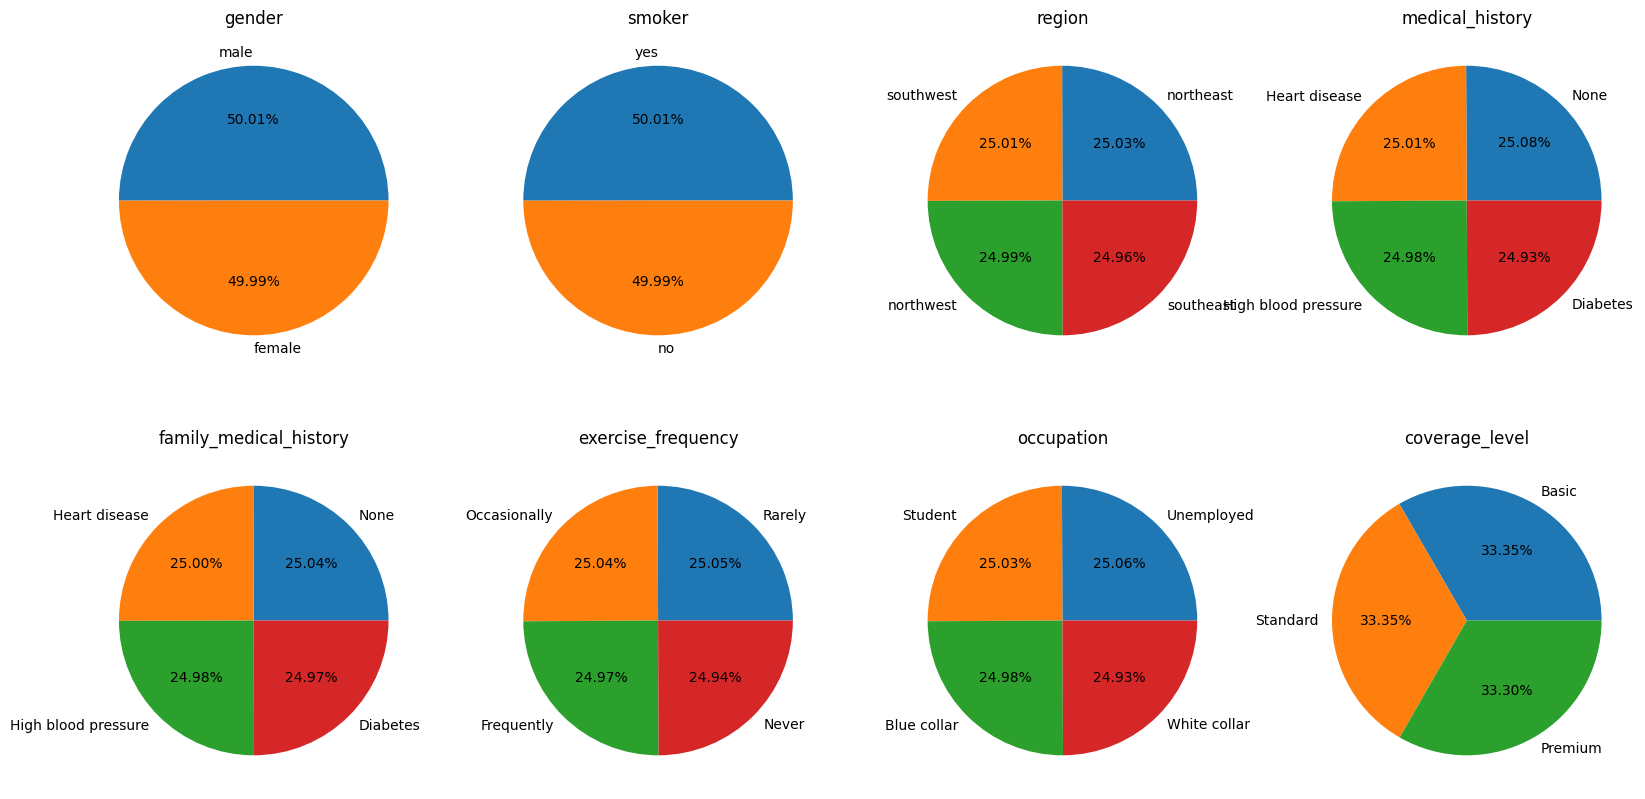

In [6]:
# Distribution plot for categorical columns
features = df.select_dtypes(include=['object']).columns

plt.subplots(figsize=(20, 10))

for i, col in enumerate(features):
    plt.subplot(2, int(features.size/2), i + 1).set_title(col)

    x = df[col].value_counts()
    plt.pie(x.values,
            labels=x.index,
            autopct='%2.2f%%')

plt.show()


Above suggest that fair data distribution has been provided for the entire dataset based on all columns

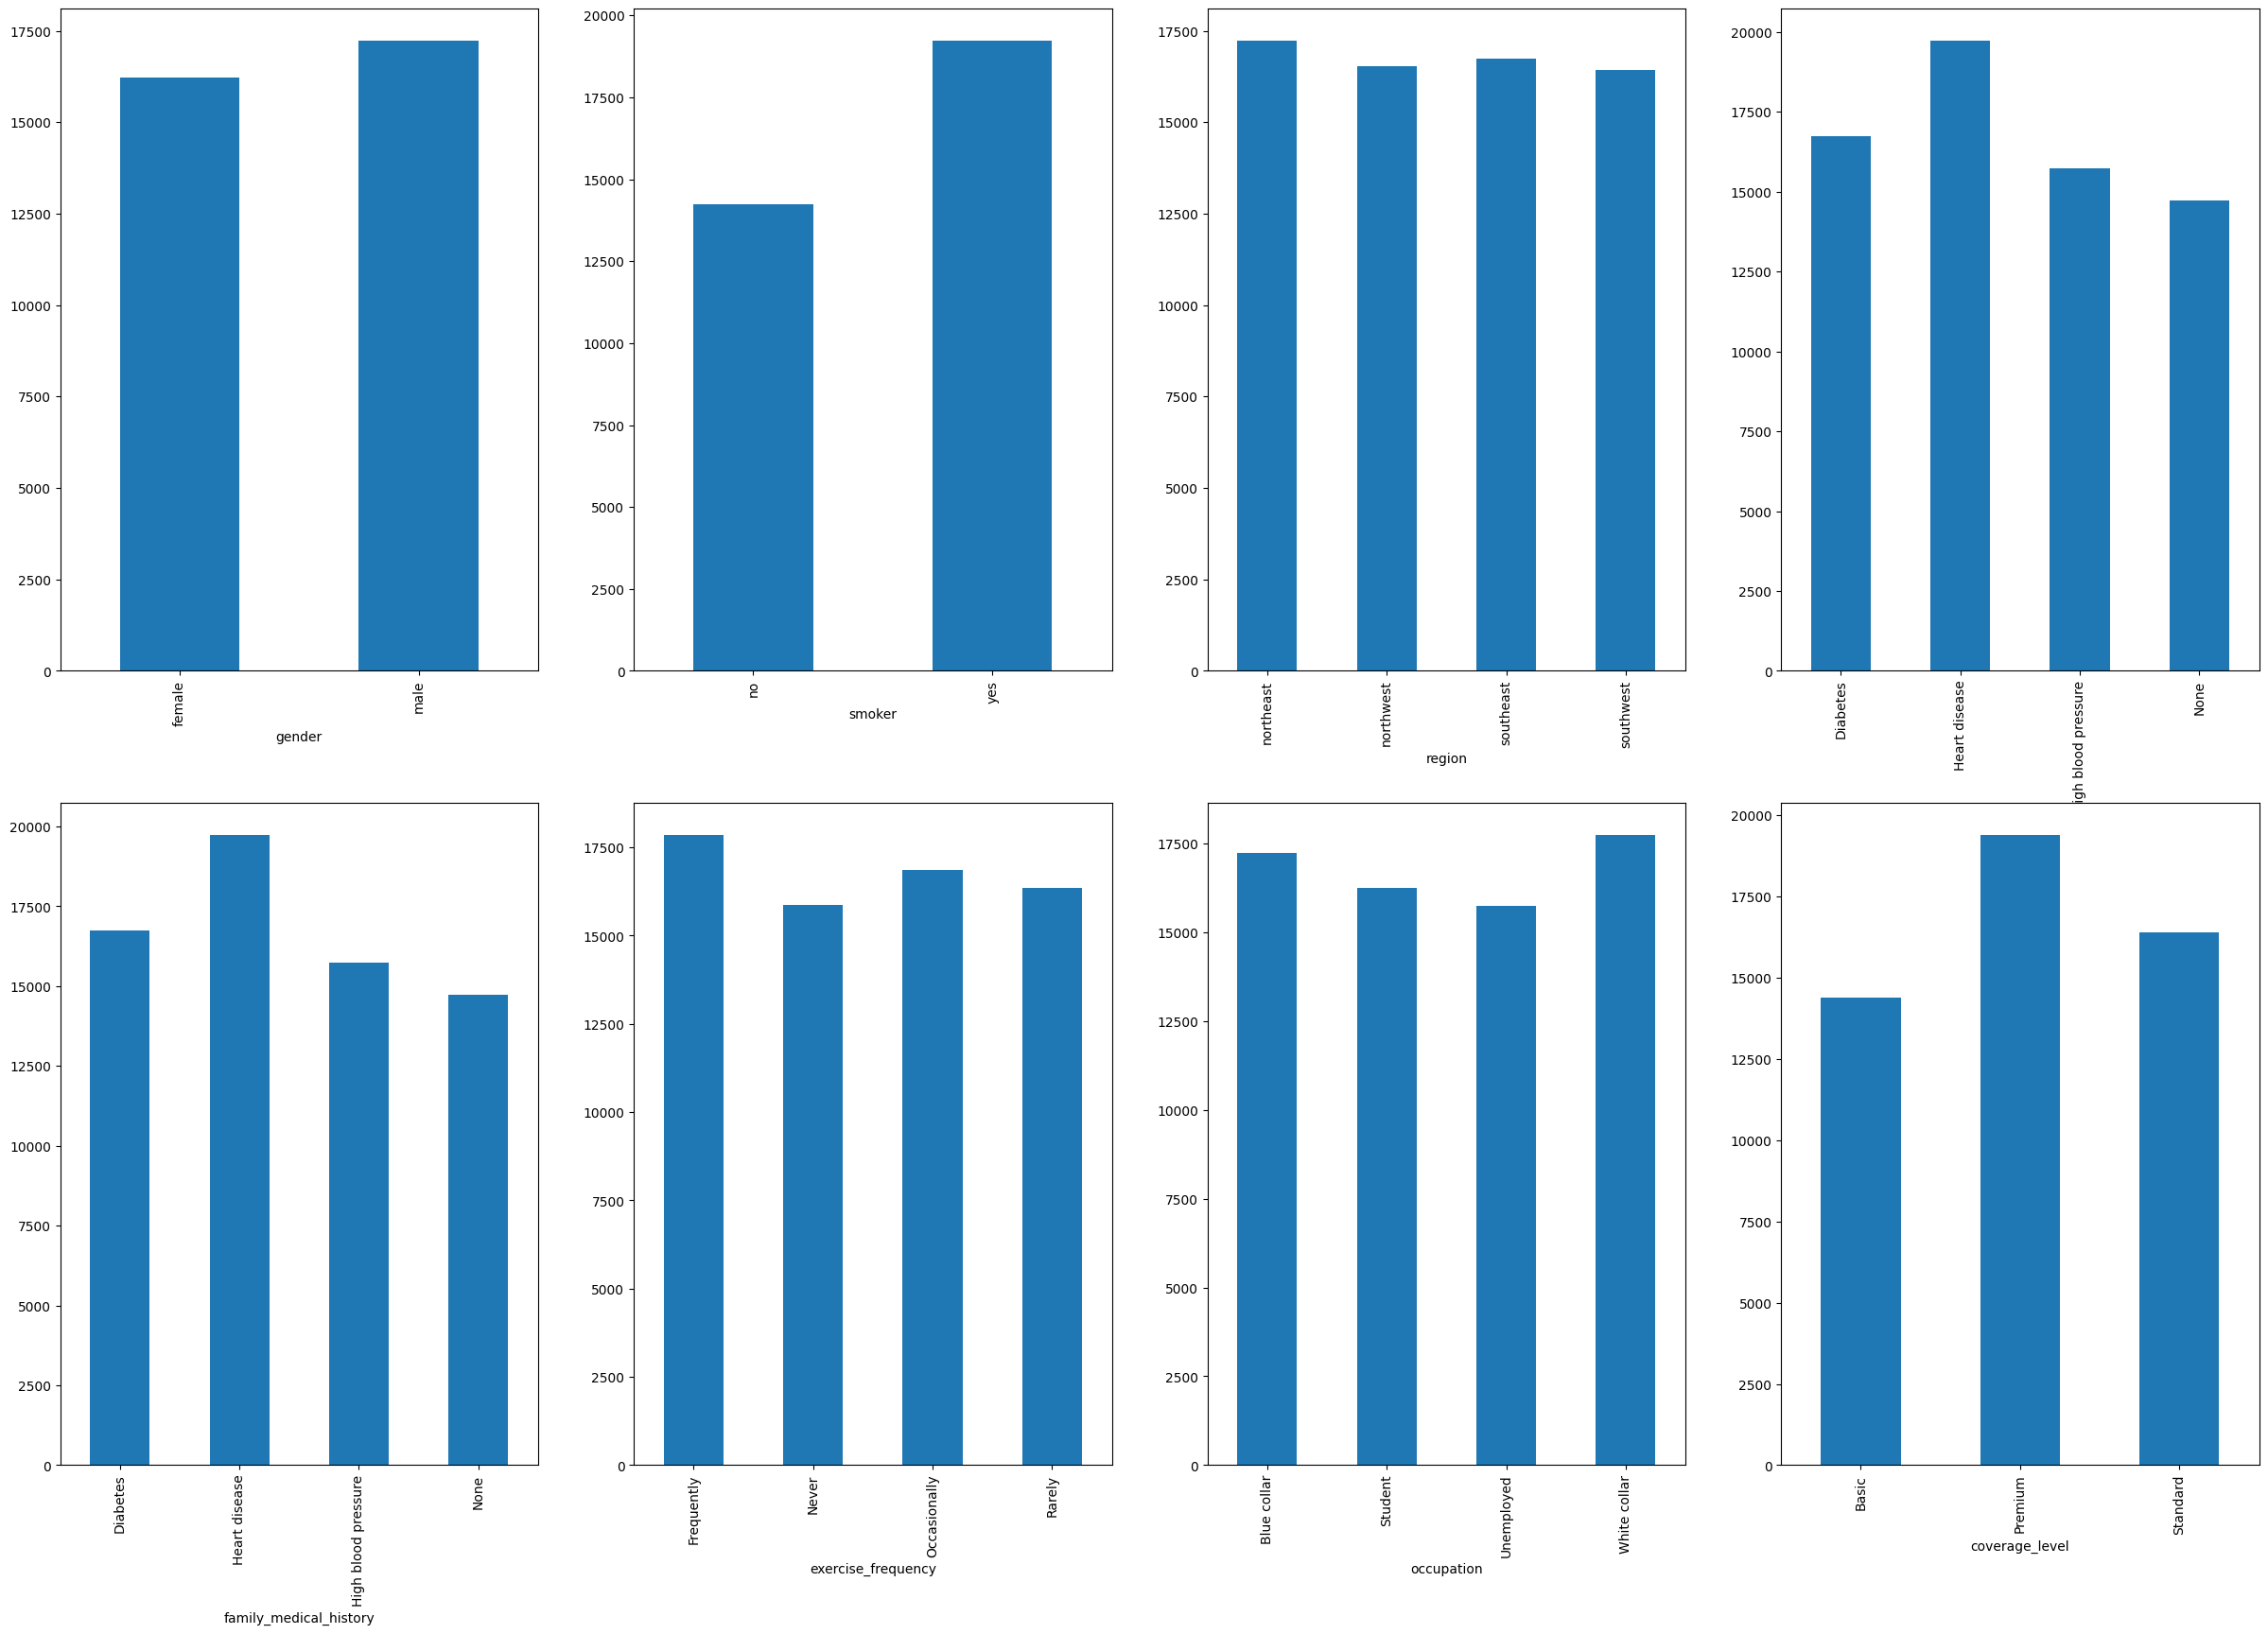

In [7]:
# Comparison of mean charges against categorical columns
plt.subplots(figsize=(30, 20))
for i, col in enumerate(features):
    plt.subplot(2, int(features.size/2), i + 1)
    df.groupby(col).mean()['charges'].plot.bar()
plt.show()

Now let’s look at some of the observations which are shown in the above graphs:

* Charges are on the higher side for males as compared to females but the difference is not that much.
* Premium charged from the smoker is around almost 5k more that which is charged from non-smokers.
* Charges are approximately the same in the given four regions.
* Occupation or exercise frequency doesn't matter much for deciding charges
* Charges is on higher side for people with Heart disease
* Charges are higher for people taking premium coverage

<Axes: xlabel='children'>

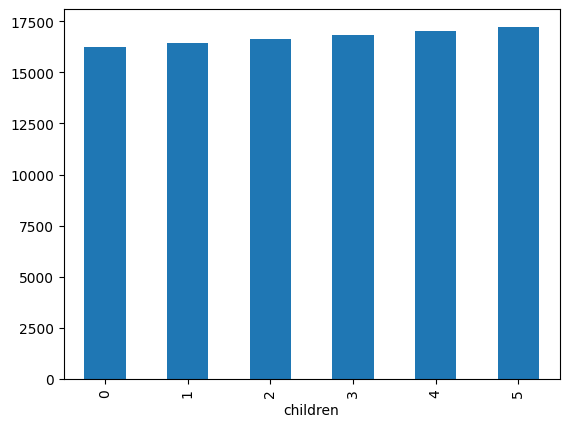

In [8]:
# Comparison of charges based on number of children
df.groupby('children').mean()['charges'].plot.bar()

<Axes: xlabel='age'>

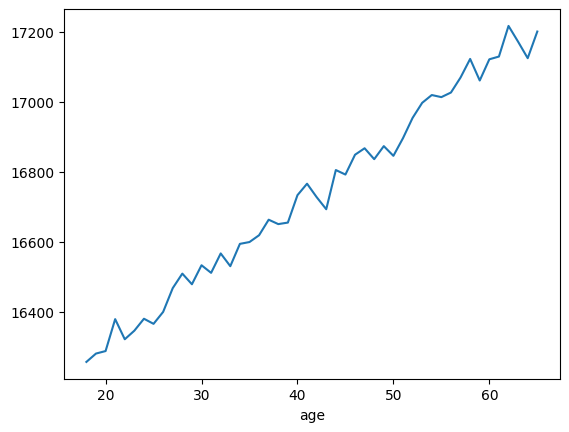

In [9]:
# Comparison of charges based on age
df.groupby('age').mean()['charges'].plot()

<Axes: >

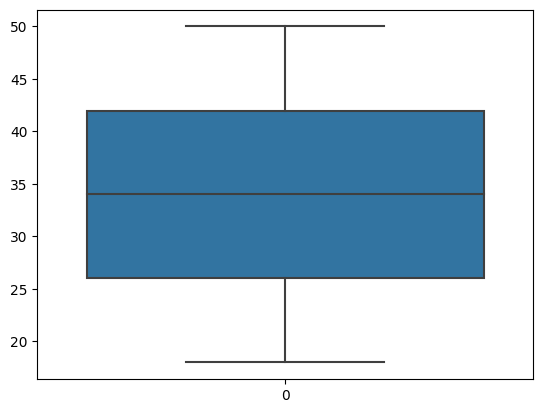

In [10]:
# Checking box plot to identify outliers as bmi data seems continuous as seen via describe function
sns.boxplot(df['bmi'])

<Axes: >

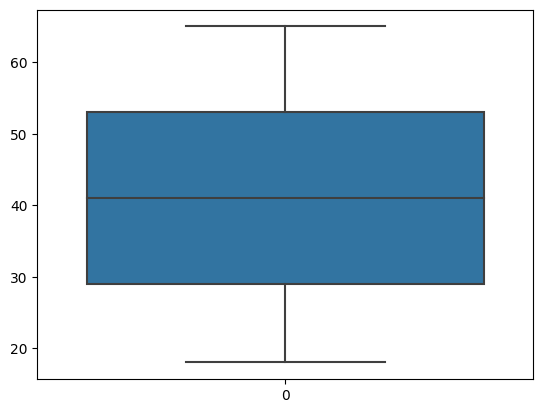

In [11]:
sns.boxplot(df['age'])

<Axes: >

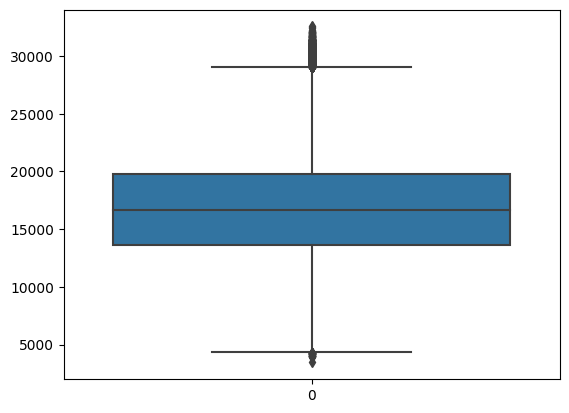

In [12]:
sns.boxplot(df['charges'])

# Convert categoricals to Numeric

In [13]:
df_new = pd.get_dummies(df)
df_new

,age,bmi,children,charges,gender_female,gender_male,smoker_no,smoker_yes,region_northeast,region_northwest,...,exercise_frequency_Never,exercise_frequency_Occasionally,exercise_frequency_Rarely,occupation_Blue collar,occupation_Student,occupation_Unemployed,occupation_White collar,coverage_level_Basic,coverage_level_Premium,coverage_level_Standard
0,46,21.45,5,20460.307669,0,1,0,1,0,0,...,1,0,0,1,0,0,0,0,1,0
1,25,25.38,2,20390.899218,1,0,0,1,0,1,...,0,1,0,0,0,0,1,0,1,0
2,38,44.88,2,20204.476302,0,1,0,1,0,0,...,0,1,0,1,0,0,0,0,1,0
3,25,19.89,0,11789.029843,0,1,1,0,0,1,...,0,0,1,0,0,0,1,0,0,1
4,49,38.21,3,19268.309838,0,1,0,1,0,1,...,0,0,1,0,0,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
999995,59,46.67,2,11584.134900,0,1,1,0,1,0,...,0,0,0,0,1,0,0,1,0,0
999996,33,36.83,2,9834.871456,0,1,1,0,1,0,...,0,0,0,0,0,1,0,1,0,0
999997,39,39.84,0,22076.632856,0,1,0,1,1,0,...,0,0,1,1,0,0,0,0,0,1
999998,37,45.06,4,20297.618728,1,0,0,1,1,0,...,0,1,0,0,0,1,0,0,1,0


# Data Split

In [14]:
from sklearn.model_selection import train_test_split

y=df_new.charges
X=df_new.drop(columns='charges')
X.size,y.size

(30000000, 1000000)

In [15]:
X_train, X_test, y_train, y_test=train_test_split(X,y,test_size=0.3, random_state=42)

In [16]:
X_train.size,X_test.size,y_train.size,y_test.size

(21000000, 9000000, 700000, 300000)

Add box plot
Convert categoricals to numeric --> pd.getdummies
data split
Random forest and XGBoost modelling
getting important features
RMSC and Mean Absolute error and r-square

# Random Forest regressor

In [17]:
from sklearn.ensemble import RandomForestRegressor

model = RandomForestRegressor()

model.fit(X_train, y_train)

print(f"model score on training data: {model.score(X_train, y_train)}")
print(f"model score on testing data: {model.score(X_test, y_test)}")

model score on training data: 0.9990924165060655
model score on testing data: 0.9935083195547346


In [18]:
model.feature_importances_

array([0.00583039, 0.0139471 , 0.00601048, 0.00640971, 0.00635674,
       0.19590456, 0.12519712, 0.0034976 , 0.00025762, 0.00031203,
       0.000477  , 0.0112705 , 0.15452551, 0.00313284, 0.01123549,
       0.01159047, 0.15370063, 0.00313609, 0.01101997, 0.0214301 ,
       0.00284347, 0.00279064, 0.00050566, 0.00684826, 0.00677879,
       0.00900978, 0.00906628, 0.01609314, 0.18247614, 0.01834585])

<BarContainer object of 30 artists>

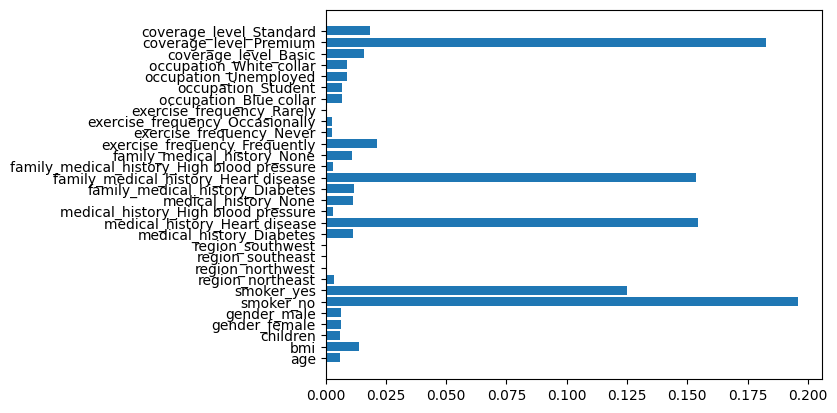

In [19]:
plt.barh(X.columns, model.feature_importances_)

In [20]:
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(y_test, model.predict(X_test))
print("The mean squared error (MSE) on test set: {:.4f}".format(mse))

The mean squared error (MSE) on test set: 126060.6967


In [22]:
from sklearn.metrics import mean_absolute_error
mae = mean_absolute_error(y_test, model.predict(X_test))
print("The mean abs error (MAE) on test set: {:.4f}".format(mae))

The mean abs error (MAE) on test set: 292.6277


In [21]:
from sklearn.metrics import r2_score
r2 = r2_score(y_test, model.predict(X_test))
print("The R2 Score on test set: {:.4f}".format(r2))

The R2 Score on test set: 0.9935


# XGBoost Regressor

In [23]:
from sklearn.ensemble import GradientBoostingRegressor
model = GradientBoostingRegressor()

model.fit(X_train, y_train)

print(f"model score on training data: {model.score(X_train, y_train)}")
print(f"model score on testing data: {model.score(X_test, y_test)}")

model score on training data: 0.9878271387547957
model score on testing data: 0.9877264185972863


In [24]:
model.feature_importances_

array([3.21976894e-03, 1.02182449e-02, 5.22757844e-03, 6.08526870e-03,
       6.47169132e-03, 1.61276154e-01, 1.63356164e-01, 3.82991700e-03,
       1.56823961e-04, 6.59674529e-05, 2.10043935e-04, 6.92659130e-03,
       1.45870523e-01, 2.91106866e-03, 2.55009503e-02, 3.97232444e-03,
       1.42826182e-01, 6.33504225e-03, 2.78346340e-02, 1.81692760e-02,
       6.93546598e-03, 6.45099030e-04, 1.77563221e-03, 5.35119117e-03,
       4.91291806e-03, 1.03898416e-02, 1.07371837e-02, 7.00682668e-02,
       1.48720187e-01, 0.00000000e+00])

<BarContainer object of 30 artists>

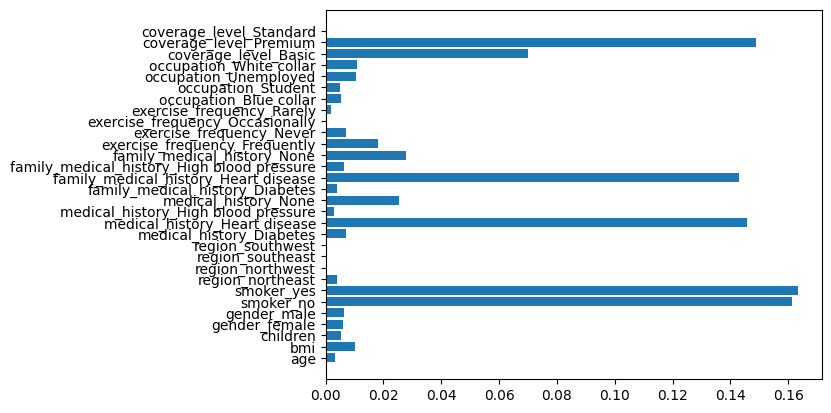

In [25]:
plt.barh(X.columns, model.feature_importances_)

In [26]:
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(y_test, model.predict(X_test))
print("The mean squared error (MSE) on test set: {:.4f}".format(mse))

The mean squared error (MSE) on test set: 238338.3217


In [27]:
from sklearn.metrics import mean_absolute_error
mae = mean_absolute_error(y_test, model.predict(X_test))
print("The mean abs error (MAE) on test set: {:.4f}".format(mae))

The mean abs error (MAE) on test set: 393.6464


In [28]:
from sklearn.metrics import r2_score
r2 = r2_score(y_test, model.predict(X_test))
print("The R2 Score on test set: {:.4f}".format(r2))

The R2 Score on test set: 0.9877


## From above, we see that random forest gives more accurate results than xgboost

### We will use random forest as model for flask deployment and save same.